In [140]:
import pandas as pd

In [141]:
death=pd.read_csv("death.csv")
death

,year,month,day,gender,death,state,causes
0,1983.0,1,1.0,F,3694.0,karnataka,natural
1,1983.0,1,1.0,M,3697.0,karnataka,accident
2,NaN,1,2.0,NaN,NaN,uttar pradesh,NaN
3,1983.0,1,2.0,M,4184.0,uttar pradesh,suicide
4,1983.0,1,3.0,F,4453.0,kerala,homicide
...,...,...,...,...,...,...,...
5625,2008.0,10,NaN,M,183219.0,madya pradesh,suicide
5626,2008.0,11,NaN,F,158939.0,madya pradesh,suicide
5627,2008.0,11,NaN,M,165468.0,madya pradesh,suicide
5628,2008.0,12,NaN,F,173215.0,madya pradesh,suicide


In [142]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5629 non-null   float64
 1   month   5630 non-null   int64  
 2   day     5174 non-null   float64
 3   gender  5629 non-null   object 
 4   death   5629 non-null   float64
 5   state   5630 non-null   object 
 6   causes  5629 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 308.0+ KB


In [143]:
# Data cleaning

# Checking null values
death.isnull()

,year,month,day,gender,death,state,causes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,True,False,False,True,True,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5625,False,False,True,False,False,False,False
5626,False,False,True,False,False,False,False
5627,False,False,True,False,False,False,False
5628,False,False,True,False,False,False,False


In [144]:
# Identifying missing values(NaN -> Not a Number)
# How many NaN are there 
death.isna().sum()

year        1
month       0
day       456
gender      1
death       1
state       0
causes      1
dtype: int64

In [145]:
# To fill null values using the specified value
death['day'].fillna(0, inplace=True)
death['day']=death['day'].astype(int)
death.tail()

,year,month,day,gender,death,state,causes
5625,2008.0,10,0,M,183219.0,madya pradesh,suicide
5626,2008.0,11,0,F,158939.0,madya pradesh,suicide
5627,2008.0,11,0,M,165468.0,madya pradesh,suicide
5628,2008.0,12,0,F,173215.0,madya pradesh,suicide
5629,2008.0,12,0,M,181235.0,madya pradesh,suicide


In [146]:
# Checking null values
death.isna().sum()

year      1
month     0
day       0
gender    1
death     1
state     0
causes    1
dtype: int64

In [147]:
#dropping a row with multiple missing values
death.dropna(inplace=True)
death.head(5)

,year,month,day,gender,death,state,causes
0,1983.0,1,1,F,3694.0,karnataka,natural
1,1983.0,1,1,M,3697.0,karnataka,accident
3,1983.0,1,2,M,4184.0,uttar pradesh,suicide
4,1983.0,1,3,F,4453.0,kerala,homicide
5,1983.0,1,3,M,4513.0,kerala,natural


In [148]:
death['year']=death['year'].astype(int)
death['death']=death['death'].astype(int)
death.head(5)

,year,month,day,gender,death,state,causes
0,1983,1,1,F,3694,karnataka,natural
1,1983,1,1,M,3697,karnataka,accident
3,1983,1,2,M,4184,uttar pradesh,suicide
4,1983,1,3,F,4453,kerala,homicide
5,1983,1,3,M,4513,kerala,natural


In [149]:
# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

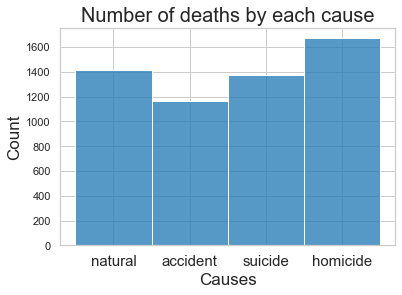

In [150]:
# Histogram
sns.histplot(data=death,x="causes" )
plt.title("Number of deaths by each cause", fontsize = 20)
plt.xlabel("Causes",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.xticks(size=15)
plt.show()

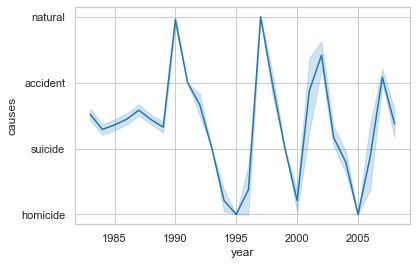

In [151]:
# Lineplot
sns.lineplot(x="year", y="causes", data=death)
sns.set_style("whitegrid")
#style white,dark,whitgrid,darkgrid
sns.set_context("notebook")
#context paper,poster,talk,notebook
plt.show()

<AxesSubplot:xlabel='death', ylabel='state'>

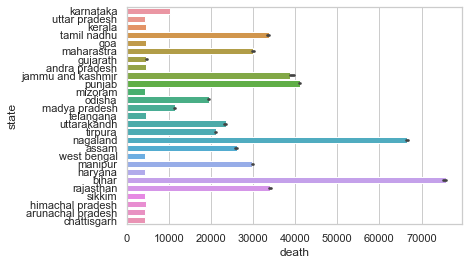

In [152]:
# Bargraph
sns.barplot(x="death",y="state",ci=4, data=death)

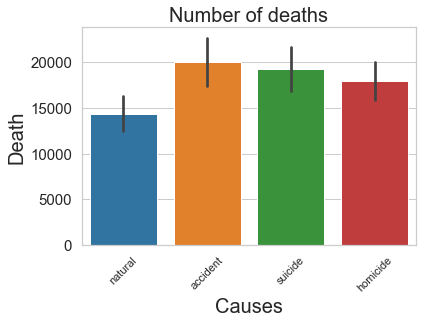

In [153]:
sns.barplot(x="causes", y="death", data=death )
plt.title("Number of deaths",fontsize=20)
plt.xlabel("Causes",fontsize=20)
plt.ylabel("Death",fontsize=20)
plt.xticks(rotation=45)
plt.yticks(size=15)
plt.show()

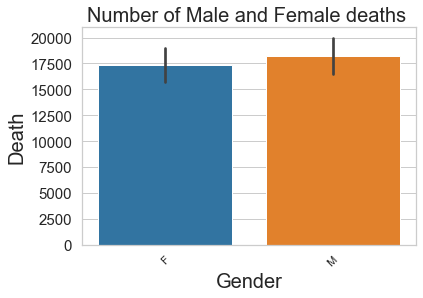

In [154]:
sns.barplot(x="gender", y="death", data=death )
plt.title("Number of Male and Female deaths ",fontsize=20)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Death",fontsize=20)
plt.xticks(rotation=45)
plt.yticks(size=15)
plt.show()

<AxesSubplot:>

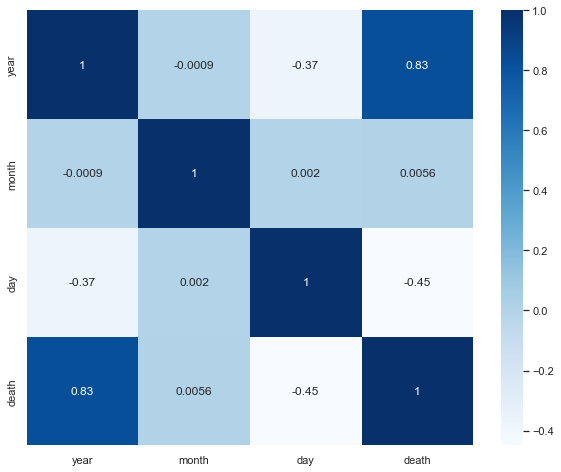

In [155]:
# Heatmap
fig=plt.figure(figsize=(10,8))
sns.heatmap(death.corr() ,cmap='Blues' ,annot=True)

[[   0 2542]
 [   0 2525]]


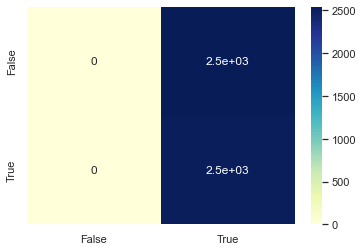

In [156]:
#Confusion matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = death['death'].values  #independent variable
y = death['gender'].values   #dependent variable

X = X.reshape(-1,1)

X = X.reshape(-1,1)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

ax=sns.heatmap(cm,annot=True,cmap='YlGnBu')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


In [157]:
#Logistic regression analysis

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
X = death['death'].values  #independent variable
y = death['gender'].values   #dependent variable

X = X.reshape(-1,1)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print(accuracies)
print("accuracy:{:.2f}%".format(accuracies.mean()*100))
print("standard deviation:{:.2f}%".format(accuracies.std()*100))

[[   0 2542]
 [   0 2525]]
[0.50877193 0.50877193 0.51785714 0.51785714 0.51785714 0.51785714
 0.51785714 0.51785714 0.5        0.5       ]
accuracy:51.25%
standard deviation:0.72%


In [158]:
# Time series analysis using year

death.set_index("year", inplace = True)
death.head()

,month,day,gender,death,state,causes
year,,,,,,
1983,1,1,F,3694,karnataka,natural
1983,1,1,M,3697,karnataka,accident
1983,1,2,M,4184,uttar pradesh,suicide
1983,1,3,F,4453,kerala,homicide
1983,1,3,M,4513,kerala,natural


In [159]:
death.index

Int64Index([1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
            ...
            2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008],
           dtype='int64', name='year', length=5629)

In [160]:
death.loc['1983'].head()

,month,day,gender,death,state,causes
year,,,,,,
1983,1,1,F,3694,karnataka,natural
1983,1,1,M,3697,karnataka,accident
1983,1,2,M,4184,uttar pradesh,suicide
1983,1,3,F,4453,kerala,homicide
1983,1,3,M,4513,kerala,natural


In [161]:
death.loc['1983':'1990']

,month,day,gender,death,state,causes
year,,,,,,
1983,1,1,F,3694,karnataka,natural
1983,1,1,M,3697,karnataka,accident
1983,1,2,M,4184,uttar pradesh,suicide
1983,1,3,F,4453,kerala,homicide
1983,1,3,M,4513,kerala,natural
...,...,...,...,...,...,...
1990,10,0,M,181247,punjab,natural
1990,11,0,F,163036,punjab,natural
1990,11,0,M,170515,punjab,natural


In [164]:
#Counting total number of deaths per each yaer

year = death.groupby(["year"])["death"].count()
year = pd.DataFrame(year)
year.rename(columns = {"death":"Total_Deaths"},inplace = True)
year.reset_index(inplace=True)
year = year.astype(int)
year

,year,Total_Deaths
0,1983,739
1,1984,742
2,1985,741
3,1986,738
4,1987,740
5,1988,743
6,1989,730
7,1990,24
8,1991,24
9,1992,24
